<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>LightGBM Boost Classification</b></p>

**About Dataset**

Machine Learning Model to Predict Clicks on Ads

* **Daily Time Spent on Site**: consumer time on site in minutes
* **Age**: cutomer age in years
* **Area Income**: Avg. Income of geographical area of consumer
* **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of consumer
* **Male**: Whether or not consumer was male
* **Country**: Country of consumer
* **Timestamp**: Time at which consumer clicked on Ad or closed window
* **Clicked on Ad**: 0 or 1 indicated clicking on Ad

# <font color='firebrick'> <b>Importing Libraries</b><font color='black'>  

In [64]:
# !pip install lightgbm

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from lightgbm import LGBMClassifier

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'>

In [67]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [68]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
228,70.68,31,74430.08,199.08,Configurable multi-state utilization,Robertbury,0,Colombia,2016-07-17 01:58:53,0
583,68.60,33,68448.94,135.08,Focused high-level frame,Tammyshire,0,Taiwan,2016-02-17 18:50:57,1
844,89.18,37,46403.18,224.01,Public-key impactful neural-net,Rickymouth,1,Nepal,2016-04-26 21:45:50,0
282,40.67,35,48913.07,133.18,Stand-alone encompassing throughput,West Amanda,0,Lebanon,2016-05-05 09:28:36,1
576,37.05,39,49742.83,142.81,Automated object-oriented firmware,Tracyhaven,1,Antigua and Barbuda,2016-02-03 05:47:09,1
195,71.86,32,51633.34,116.53,Face-to-face even-keeled website,Kentmouth,0,Senegal,2016-05-17 06:14:20,1
149,68.61,57,61770.34,150.29,Diverse modular interface,South George,0,South Africa,2016-04-10 19:48:01,1
989,70.96,31,55187.85,256.40,Ameliorated user-facing help-desk,South Denise,0,Saint Pierre and Miquelon,2016-06-26 07:01:47,0
322,86.78,30,54952.42,170.13,Fundamental zero tolerance solution,New Steve,1,United States of America,2016-02-18 23:08:59,0
701,69.77,54,57667.99,132.27,Face-to-face dedicated flexibility,Port Sherrystad,0,Malta,2016-06-01 03:17:50,1


# <font color='firebrick'> <b>Understanding Data & EDA</b><font color='black'>

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [72]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [73]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [74]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [75]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [76]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# The unique counts of categorical features are being identified.
# Categorical features with a high number of unique observations will be dropped.
# Tree-based models tend to assign excessive importance to features with many unique categories.
# Additionally, features with few unique observations fail to provide meaningful learning to the model.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


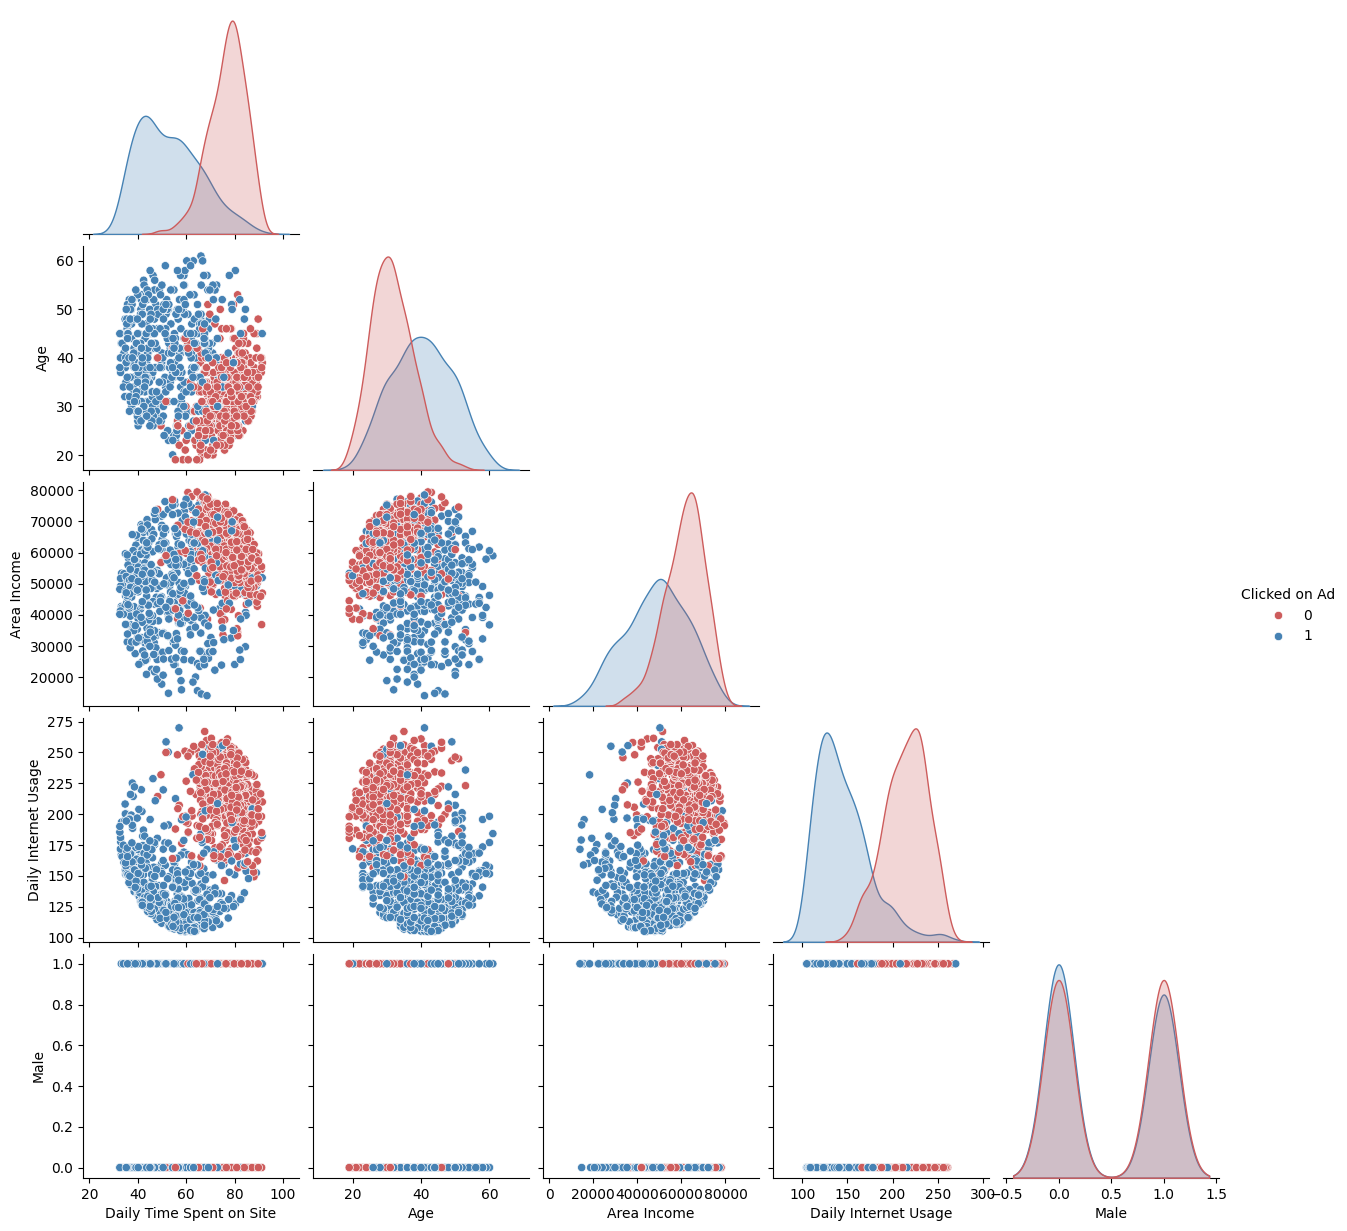

In [77]:
sns.pairplot(df, hue="Clicked on Ad", corner=True, palette=["indianred", "steelblue"]);

# <font color='firebrick'> <b>Modeling</b><font color='black'>

## <font color='indianred'> <b>Train | Test Split</b><font color='black'>

In [80]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## <font color='indianred'> <b>Light GBM Modeling</b><font color='black'>

**Light GBM (Light Gradient Boosting Machine)** is a gradient boosting method developed by Microsoft in 2017 to improve the training time performance of XGBoost. It is highly efficient and capable of working with large datasets at high speeds. This method is especially popular for large datasets and complex machine learning problems.

**Features of Light GBM**
**Fast Training and Prediction Times:** Light GBM can process datasets quickly, saving time when working with large datasets. It may not be a good choice for datasets under 9K-10K due to the increased risk of overfitting in smaller datasets. In short, I recommend Light GBM for large datasets.

**Low Memory Usage:** Thanks to optimization techniques, Light GBM uses less memory compared to other gradient boosting frameworks.

**High Performance:** With its advanced algorithms, Light GBM achieves high accuracy rates and often outperforms traditional gradient boosting methods.

**Supported Features:** Ability to handle missing values in datasets.

**Note:** Although the implementation is simple, Light GBM has more than 100 parameters, so it is useful to read the relevant documentation beforehand to at least understand what these parameters do.

[DOCUMENTATION LINK](https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst)

**Working Principle of Light GBM**
Unlike other gradient boosting methods, Light GBM grows trees in a leaf-wise manner. This method splits subsets of the dataset more evenly during training, resulting in fewer errors. As the dataset grows, this approach can be more effective compared to other methods (level-wise).

**Applications of Light GBM**
Large Datasets: Light GBM can efficiently handle large and complex datasets.
High-Performance Applications: Suitable for real-time applications or tasks requiring high accuracy.
Various Problems: Can be used for both classification and regression problems.

**Conclusion**
Light GBM is a powerful machine learning tool designed for large and complex datasets, offering high efficiency, speed, and accuracy. It is an ideal choice for researchers and developers looking to achieve effective results in various problems and large datasets.

GBM = Decision Tree + Boosting + Gradient Descent

LightGBM = GBM + GOSS + EFB

LightGBM (Light Gradient Boosting Machine) is an open-source machine learning library written in C++.

LightGBM was developed by Microsoft and is designed to work quickly and effectively on large datasets. LightGBM uses a distributed training algorithm that can provide faster training times compared to other popular gradient boosting libraries (e.g., XGBoost).

LightGBM is built on a C++-based core but has various language bindings and interfaces available for use in Python, R, Java, and many other programming languages. This allows you to use LightGBM in your preferred programming language.

In LightGBM, to prevent overfitting, parameters such as learning_rate, max_depth, num_leaves, and min_data_in_leaf can be optimized. For speeding up the learning process, parameters like feature_fraction, bagging_fraction,and num_iteration can be optimized.


---

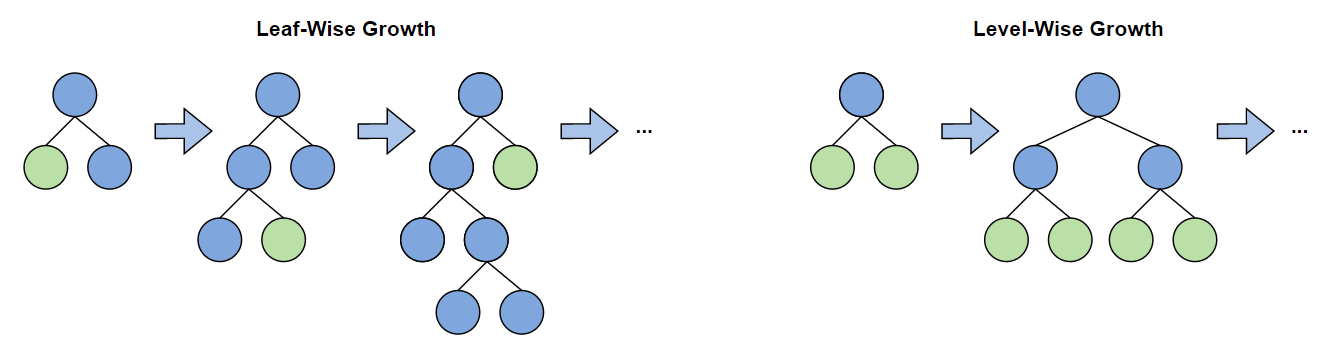

---

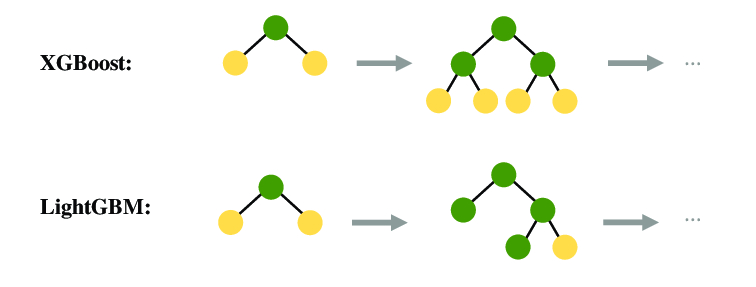

In [86]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(random_state=42)

In [90]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [92]:
eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.96      0.93      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## <font color='indianred'> <b>Cross Validation</b><font color='black'>

In [94]:
model = LGBMClassifier(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'accuracy', 'precision_macro', 'recall_macro',
                            'f1_macro', 'roc_auc_ovr'
                        ],
                        cv=10,
                        verbose=0
                       )

df_scores = pd.DataFrame(scores, index=range(1, 11))
mean_scores = df_scores.mean()[2:]

print(mean_scores)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 399, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492593 -> initscore=-0.029632
[LightGBM] [Info] Start training from score -0.029632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## <font color='indianred'> <b>GridSearchCV</b><font color='black'>

**LightGBM Hyperparameters**

**Main Hyperparameters**

* **boosting_type:**
  - **Description:** Specifies the type of boosting used. 'gbdt' (Gradient Boosting Decision Tree) is typically the default and most commonly used type.
  - **Default:** 'gbdt'
  - **Effect:** 'gbdt' is the standard boosting method. 'dart' (Dropout Boosting) can prevent overfitting by using dropout. 'goss' (Gradient-based One-Side Sampling) is optimized for large datasets.

* **num_leaves:**
  - **Description:** Specifies the maximum number of leaves in a tree.
  - **Default:** 31
  - **Effect:** More leaves allow the model to learn more complex relationships, but increase the risk of overfitting.

* **max_depth:**
  - **Description:** Specifies the maximum depth of the tree. `-1` means no limit on depth.
  - **Default:** -1
  - **Effect:** A larger value increases the model's capacity but can lead to overfitting.

* **learning_rate:**
  - **Description:** Specifies how much the model learns in each iteration.
  - **Default:** 0.1
  - **Effect:** A lower learning rate usually provides better generalization but requires more iterations.

* **n_estimators:**
  - **Description:** The total number of boosting iterations (tree count) the model will train on.
  - **Default:** 100
  - **Effect:** More iterations generally provide better results, but increase training time and may lead to overfitting.

---

**Data and Feature Subsampling**

* **subsample:**
  - **Description:** Specifies the fraction of samples to be used in each iteration.
  - **Default:** 1.0
  - **Effect:** A lower value can help reduce overfitting.

* **subsample_freq:**
  - **Description:** Specifies the frequency of subsampling.
  - **Default:** 0 (no subsampling)
  - **Effect:** Higher values increase subsampling frequency, which can reduce overfitting.

* **colsample_bytree:**
  - **Description:** Specifies the fraction of features to be used in each iteration.
  - **Default:** 1.0
  - **Effect:** Lower values can reduce variance and prevent overfitting.

---

**Regularization**

* **reg_alpha:**
  - **Description:** L1 regularization (lasso) term.
  - **Default:** 0.0
  - **Effect:** Higher values help prevent overfitting.

* **reg_lambda:**
  - **Description:** L2 regularization (ridge) term.
  - **Default:** 0.0
  - **Effect:** Higher values reduce model complexity and help prevent overfitting.

---

**Leaf and Split Control**

* **min_split_gain:**
  - **Description:** The minimum gain required to make a split.
  - **Default:** 0.0
  - **Effect:** Higher values lead to simpler models with less splitting.

* **min_child_weight:**
  - **Description:** The minimum total weight of a leaf.
  - **Default:** 0.001
  - **Effect:** Higher values lead to simpler models and prevent overfitting.

* **min_child_samples:**
  - **Description:** The minimum number of samples required in a leaf.
  - **Default:** 20
  - **Effect:** Higher values result in simpler models.
 
---

**Performance and Optimization**

* **objective:**
  - **Description:** The objective function used for optimization.
  - **Default:** `'regression'` or `'binary'` (depending on the problem)
  - **Effect:** Specifies the goal of the model.

* **subsample_for_bin:**
  - **Description:** The number of samples used for creating histograms.
  - **Default:** 200000
  - **Effect:** Larger values provide more precise calculations but increase training time.

* **class_weight:**
  - **Description:** Specifies class weights (for imbalanced datasets).
  - **Default:** None
  - **Effect:** Can improve performance for imbalanced datasets.

---

**Model Interpretability**

* **importance_type:**
  - **Description:** The method used for determining feature importance.
  - **Default:** 'split'
  - **Effect:** 'split' counts the number of times a feature is used, while 'gain' measures the information gain.

---

**Hyperparameter Summary Table**

| **Parameter**          | **Description**                                            | **Default**       |
|------------------------|------------------------------------------------------------|-------------------|
| **boosting_type**      | The type of boosting used                                  | `'gbdt'`          |
| **num_leaves**         | Maximum number of leaves in a tree                         | 31                |
| **max_depth**          | Maximum depth of each tree                                 | -1                |
| **learning_rate**      | The learning rate                                          | 0.1               |
| **n_estimators**       | Number of trees                                             | 100               |
| **subsample**          | Fraction of samples used in each iteration                 | 1.0               |
| **colsample_bytree**   | Fraction of features used in each iteration                | 1.0               |
| **reg_alpha**          | L1 regularization coefficient                              | 0.0               |
| **reg_lambda**         | L2 regularization coefficient                              | 0.0               |
| **min_child_weight**   | Minimum total weight of a leaf                             | 0.001             |
| **min_child_samples**  | Minimum number of samples required in a leaf              | 20                |

---

**LightGBM Tuning Tips**

1. **Learning Rate and Tree Count Balance:**
   - A lower learning rate with more trees (n_estimators) typically provides better performance.

2. **Num Leaves and Max Depth:**
   - The num_leaves parameter should be set in harmony with max_depth. Higher values increase model capacity but may lead to overfitting.

3. **Regularization:**
   - Use reg_alpha and reg_lambda to limit model complexity and prevent overfitting.

4. **Subsample and Colsample:**
   - Subsample (e.g., 0.8) and colsample (e.g., 0.8) generally provide good generalization.

5. **Grid Search for Tuning:**
   - Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters.

In [97]:
lgbm_model = LGBMClassifier(random_state=42)

In [98]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 30, 50],  
    'max_depth': [-1, 3, 4, 5],     
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [99]:
lgbm_grid = GridSearchCV(estimator=lgbm_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='f1',
                         n_jobs=-1,
                         return_train_score=True).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [100]:
lgbm_grid.best_estimator_

LGBMClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=50,
               num_leaves=20, random_state=42, subsample=0.8)

In [101]:
lgbm_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'num_leaves': 20,
 'subsample': 0.8}

In [102]:
lgbm_grid.best_score_

0.9604055465196243

## <font color='indianred'> <b>Model Performance</b><font color='black'>

In [104]:
eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[455   1]
 [  9 435]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



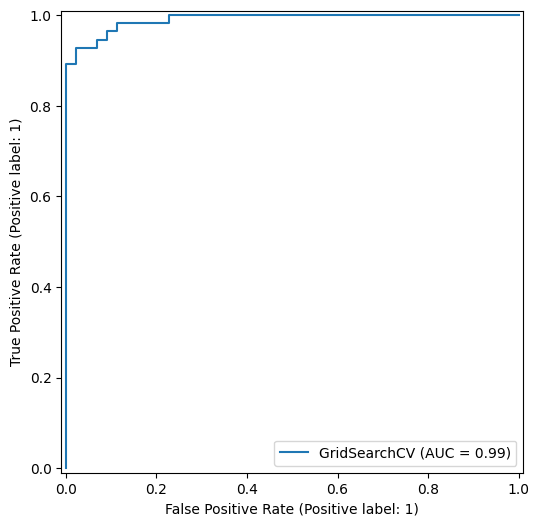

In [105]:
RocCurveDisplay.from_estimator(lgbm_grid, X_test, y_test);

In [106]:
y_pred = lgbm_grid.predict(X_test)

# process of assigning metrics to variables for comparison
lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

## <font color='indianred'> <b>Feature Importance</b><font color='black'>

In [108]:
model = LGBMClassifier(random_state=42,
                       colsample_bytree = 0.8,
                       subsample= 0.8, 
                       learning_rate=0.1, 
                       n_estimators=50,
                       max_depth=5,
                       num_leaves=20
                      )
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance", ascending=False)
lgbm_imp_feats

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,lgbm_importance
Daily Time Spent on Site,200
Daily Internet Usage,186
Area Income,182
Age,127
Male,3


---

**Future Importance in percent (%)**

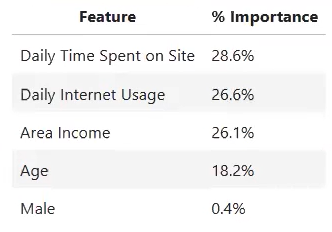

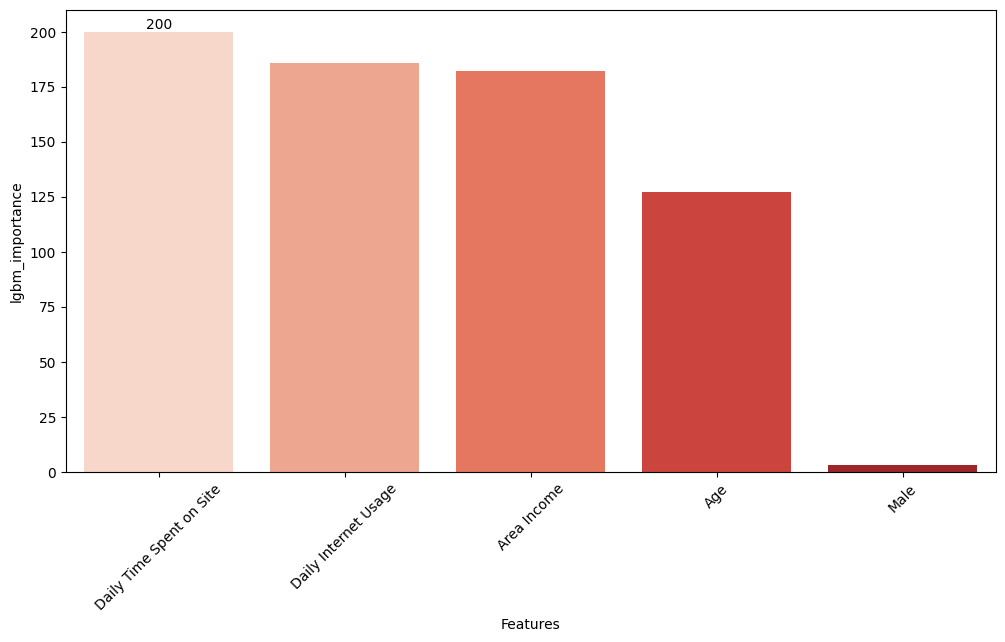

In [126]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance', palette='Reds')
ax.bar_label(ax.containers[0],fmt="%.0f")
plt.xticks(rotation=45)
plt.xlabel("Features");

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>